## Import thư viện

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from itertools import chain
from collections import Counter
from wordcloud import WordCloud
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
pd.options.display.float_format = '{:10,.2f}'.format
plt.rcParams.update({'font.size': 12})

## Khám phá dữ liệu

### Đọc dữ liệu đã xử lý ở bước Tiền xử lý

In [2]:
movies_df = pd.read_csv('./data/processed/processed_data.csv')
movies_df.head(5)

,title,domestic_revenue,world_revenue,distributor,opening_revenue,MPAA,genres,running_time,in_release,release_date
0,Batman Returns,162831698,266831698,Warner Bros.,"45,687,711.00",PG-13,"Action,Crime,Fantasy",126.00,196.00,1992-06-19
1,Evolution,38345494,98376292,DreamWorks Distribution,"13,408,351.00",PG-13,"Comedy,Sci-Fi",101.00,207.00,2001-06-08
2,Jumanji,100475249,100475249,Sony Pictures Entertainment (SPE),"11,084,370.00",PG,"Adventure,Comedy,Family,Fantasy",104.00,383.00,1995-12-15
3,The American President,60079496,60079496,Sony Pictures Entertainment (SPE),"10,014,558.00",PG-13,"Comedy,Drama,Romance",114.00,411.00,1995-11-17
4,Mulholland Drive,7220243,20117339,Universal Pictures,"587,591.00",R,"Drama,Mystery,Thriller",147.00,450.00,2001-10-08


In [3]:
movies_df.shape

(4760, 10)

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             4760 non-null   object 
 1   domestic_revenue  4760 non-null   int64  
 2   world_revenue     4760 non-null   int64  
 3   distributor       4760 non-null   object 
 4   opening_revenue   4760 non-null   float64
 5   MPAA              4760 non-null   object 
 6   genres            4760 non-null   object 
 7   running_time      4760 non-null   float64
 8   in_release        4760 non-null   float64
 9   release_date      4760 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 372.0+ KB


In [5]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             4760 non-null   object        
 1   domestic_revenue  4760 non-null   int64         
 2   world_revenue     4760 non-null   int64         
 3   distributor       4760 non-null   object        
 4   opening_revenue   4760 non-null   float64       
 5   MPAA              4760 non-null   object        
 6   genres            4760 non-null   object        
 7   running_time      4760 non-null   float64       
 8   in_release        4760 non-null   float64       
 9   release_date      4760 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 372.0+ KB


### Phân tích dữ liệu số bằng cách sử dụng thống kê mô tả

In [6]:
numeric_cols = movies_df.select_dtypes(include=np.number).columns.tolist()
df_copy = movies_df[numeric_cols]

def lower_quartile(series):
    return series.quantile(0.25)
    
def upper_quartile(series):
    return series.quantile(0.75)

def variance(series):
    return series.var()

def standard_deviation(series):
    return series.std()
    
def coefficient_of_variation(series):
    return (series.std()/series.mean())
    
def covariance(df: pd.DataFrame):
    return df.cov()
    
def correlation(df: pd.DataFrame):
    return df.corr()

column_statistics = df_copy.agg(['mean','min','max', lower_quartile, 'median', upper_quartile, variance, standard_deviation, coefficient_of_variation])
column_statistics

,domestic_revenue,world_revenue,opening_revenue,running_time,in_release
mean,"49,143,067.24","104,921,959.17","14,642,454.85",107.75,259.04
min,"153,504.00","153,504.00","4,009.00",42.00,21.00
max,"936,662,225.00","2,799,439,100.00","357,115,007.00",271.00,996.00
lower_quartile,"7,717,249.25","11,551,724.25","2,507,356.00",96.00,155.00
median,"23,996,136.50","36,603,052.00","7,806,186.50",105.00,259.00
upper_quartile,"58,501,502.50","104,933,572.75","17,102,618.50",117.00,349.00
variance,"5,562,015,499,736,306.00","39,050,629,865,391,808.00","532,883,543,945,460.25",313.67,"14,341.34"
standard_deviation,"74,578,921.28","197,612,322.15","23,084,270.49",17.71,119.76
coefficient_of_variation,1.52,1.88,1.58,0.16,0.46


### Sự tương quan và mỗi liên hệ giữa các biến

In [7]:
df_copy
corr_matrix = df_copy.corr().round(1)
corr_matrix

,domestic_revenue,world_revenue,opening_revenue,running_time,in_release
domestic_revenue,1.00,0.90,0.90,0.30,0.20
world_revenue,0.90,1.00,0.90,0.30,0.10
opening_revenue,0.90,0.90,1.00,0.30,0.10
running_time,0.30,0.30,0.30,1.00,0.10
in_release,0.20,0.10,0.10,0.10,1.00


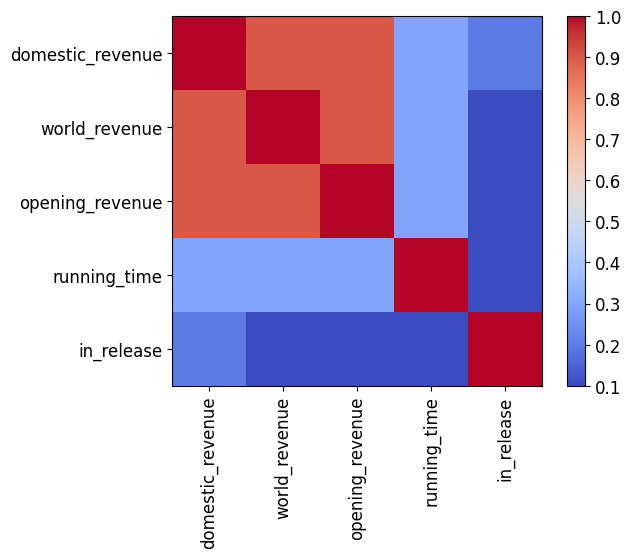

In [8]:
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(len(corr_matrix.index)), corr_matrix.index)

plt.show()

## Đặt câu hỏi

### Câu 1: Phân tích mối tương quan giữa các thể loại và tổng doanh thu của các phim từ năm 1990 đến 2022. Xu hướng phát triển của ngành công nghiệp điện ảnh thay đổi như thế nào? Liệu những thể loại phim được sản xuất nhiều có mang lại doanh thu lớn?
- Ý nghĩa khi trả lời câu hỏi:
  - Có thể biết được xu hướng và sự phát triển của các thể loại phim trong ngành công nghiệp điện ảnh. Hiểu được thể loại nào là thể loại ưa chuộng của người xem thông qua số lượng thể loại được sản xuất từng khoảng thời gian.
  - Biết được thể loại nào mang lại doanh thu cao nhất từ trước đến nay. 

In [9]:
components = movies_df['genres'].str.split(',').tolist() 
temp_list = list(chain.from_iterable(components)) 
genres_counter = Counter(temp_list)
genres_dict = dict(genres_counter)
genres_dict.keys()

dict_keys(['Action', 'Crime', 'Fantasy', 'Comedy', 'Sci-Fi', 'Adventure', 'Family', 'Drama', 'Romance', 'Mystery', 'Thriller', 'Biography', 'History', 'Western', 'Musical', 'Sport', 'Documentary', 'Music', 'War', 'Horror', 'News', 'Animation', 'Film-Noir', 'Short'])

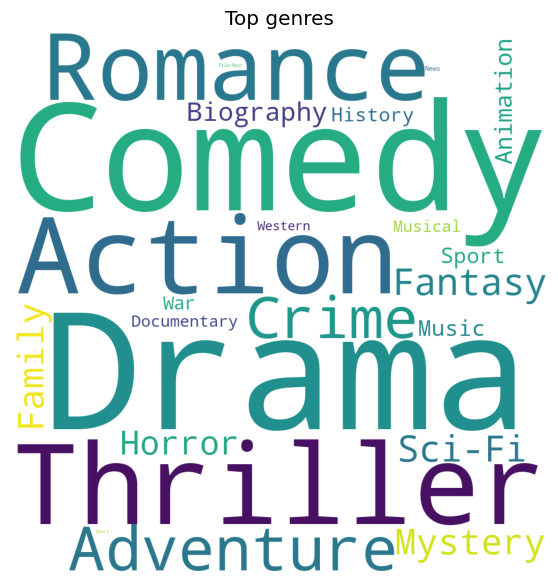

In [10]:
plt.figure(figsize = (7, 7))
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=len(genres_dict),relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(genres_dict)
plt.imshow(wc)
plt.title('Top genres')
plt.axis("off")
plt.show()

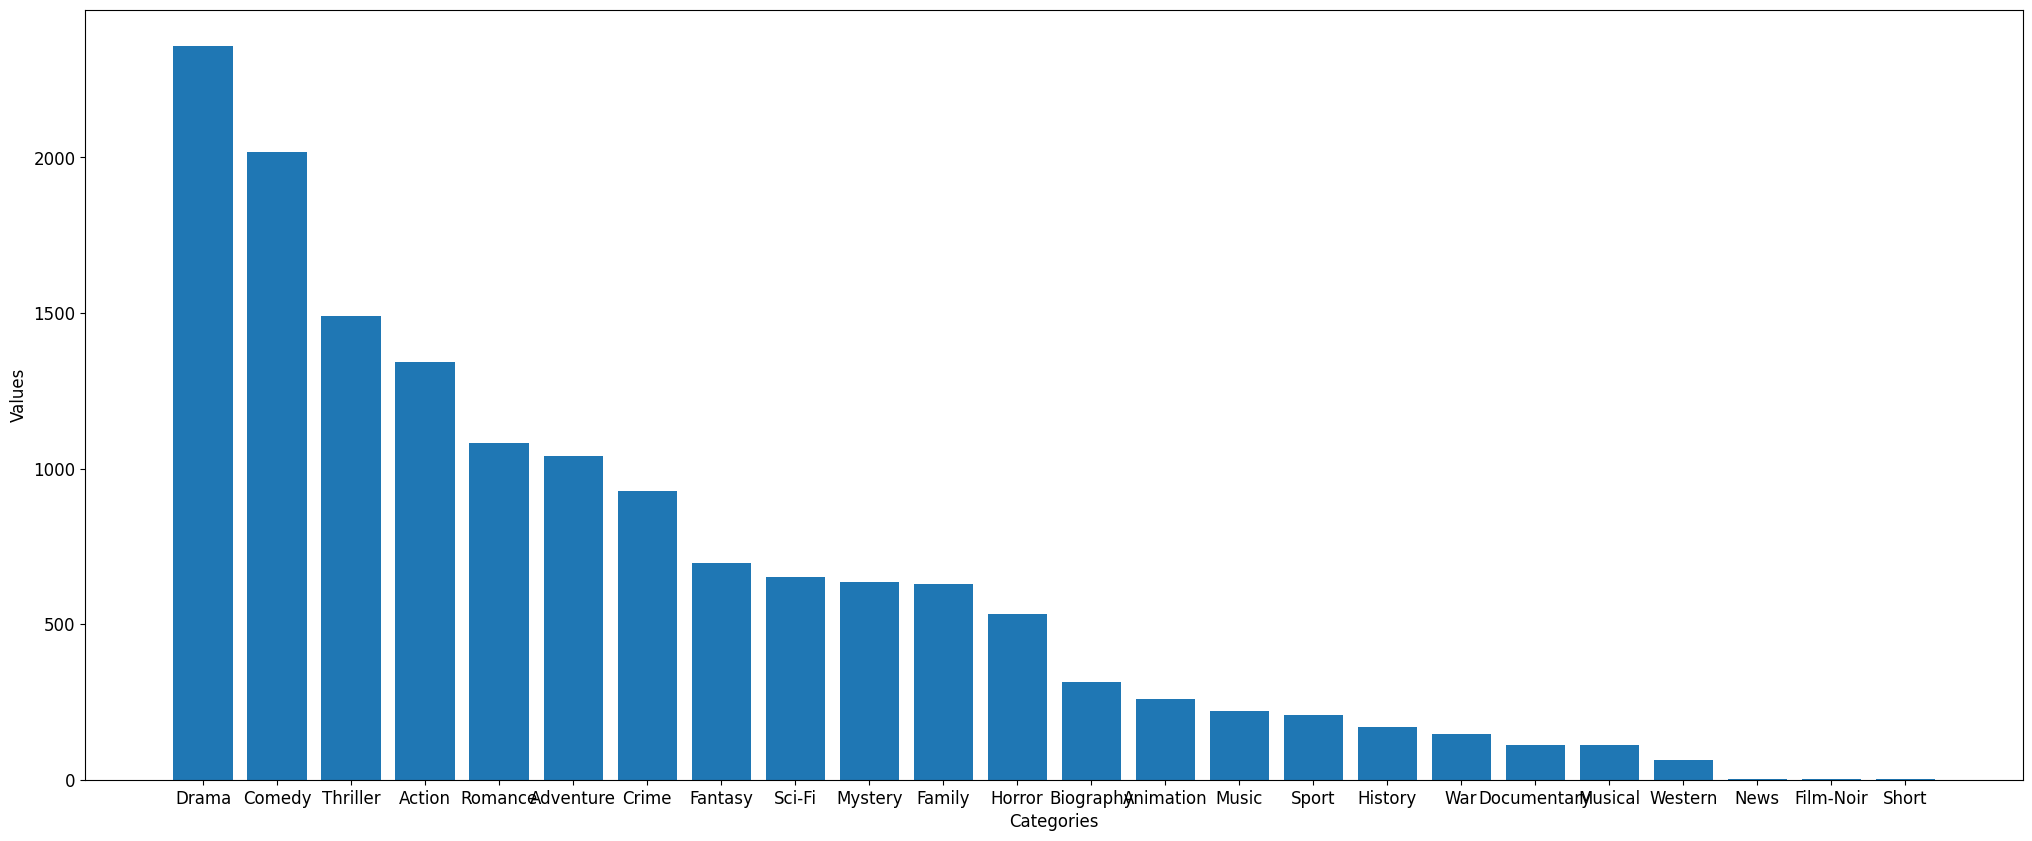

In [11]:
fig =plt.subplots(figsize=(25,10))

genres_dict = dict(sorted(genres_dict.items(), key=lambda item: item[1], reverse=True))
genre=list(genres_dict.keys())
num_film=list(genres_dict.values())

# Vẽ bar plot
plt.bar(genre, num_film)

# Thêm tiêu đề và nhãn cho trục x, y

plt.xlabel('Categories')
plt.ylabel('Values')

# Hiển thị biểu đồ
plt.show()

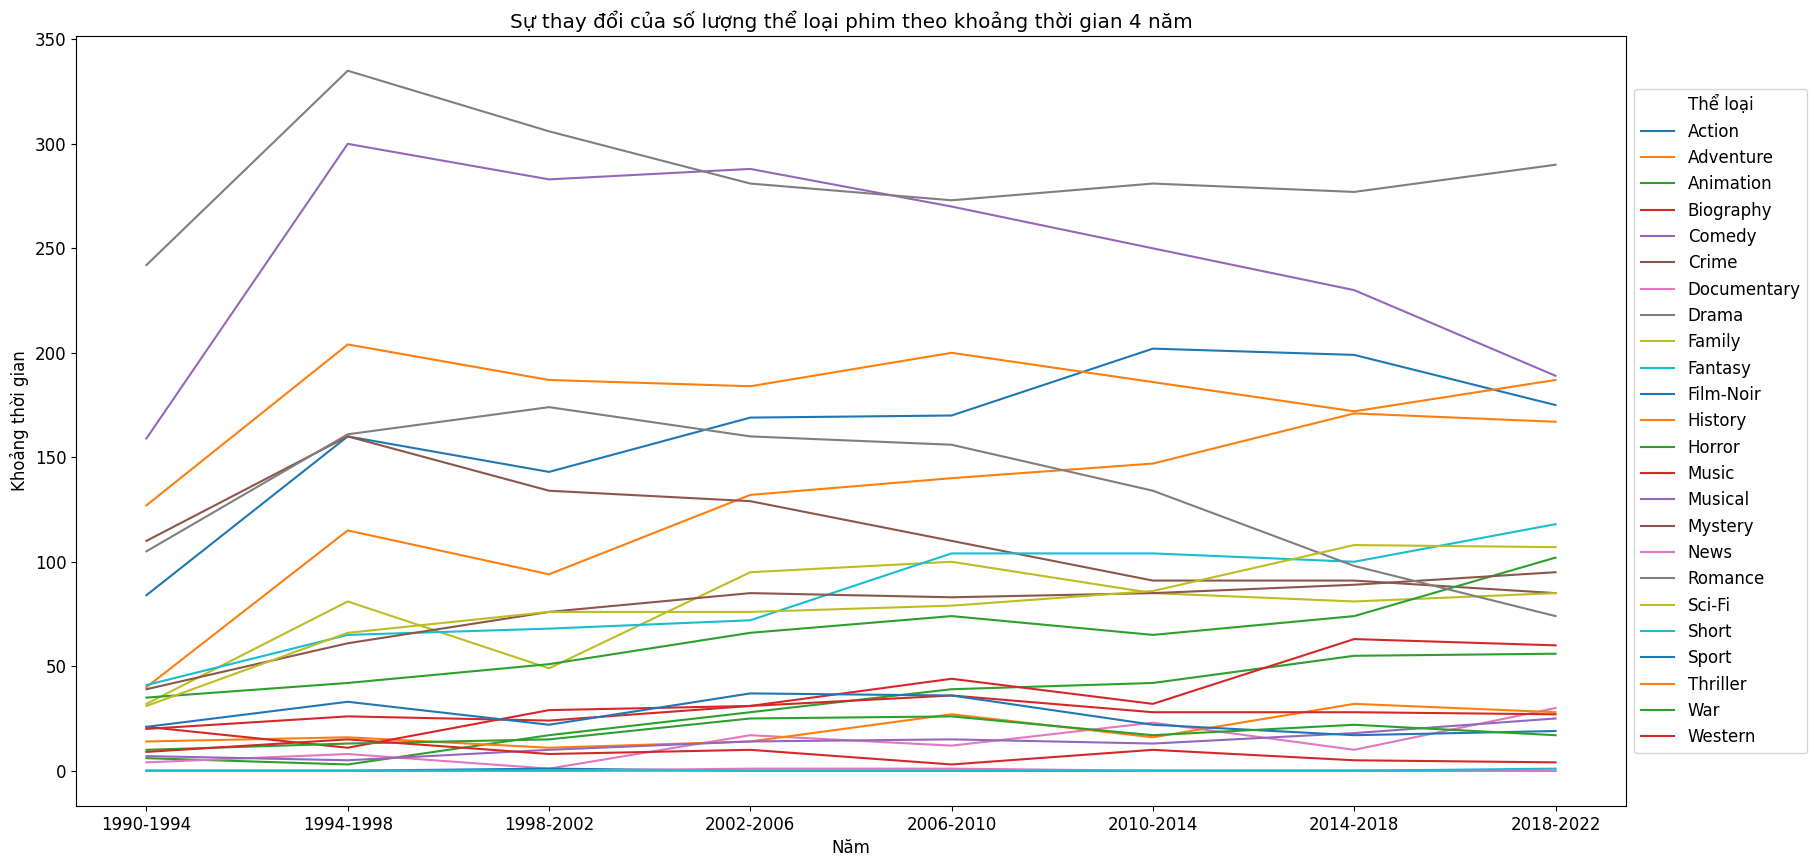

In [12]:
# Tạo cột 'release_year_bin' để phân loại năm vào các khoảng 4 năm
year_ranges = ['1990-1994','1994-1998','1998-2002','2002-2006','2006-2010','2010-2014','2014-2018','2018-2022']
x_positions = list(range(len(year_ranges)))

df_copy = movies_df.copy()
df_copy['release_date'] = pd.to_datetime(df_copy['release_date'])
df_copy['release_year'] = df_copy['release_date'].dt.year
df_copy['release_year_bin'] = pd.cut(df_copy['release_year'], bins=range(df_copy['release_year'].min(), df_copy['release_year'].max(), 4), labels=False)

# Tạo các biến giả cho thể loại phim
genres_dummies = df_copy['genres'].str.get_dummies(',')

# Ghép các biến giả vào DataFrame
df_copy = pd.concat([df_copy, genres_dummies], axis=1)

# Gom nhóm và tính tổng số lượng mỗi thể loại trong từng khoảng thời gian
grouped_data = df_copy.groupby('release_year_bin')[genres_dummies.columns].sum()

fig =plt.subplots(figsize=(20,10))
plt.plot(grouped_data)
plt.xlabel('Năm')
plt.ylabel('Khoảng thời gian')
plt.xticks(x_positions,year_ranges)
plt.title('Sự thay đổi của số lượng thể loại phim theo khoảng thời gian 4 năm')
plt.legend(grouped_data.columns,title='Thể loại',loc='center left',bbox_to_anchor=(1.0,0.5))
plt.show()

Từ biểu đồ cột trên, ta thấy rằng:
- Từ năm 1990 đến 2022, thể loại `Drama(Chính kịch)` là thể loại được nhiều nhà sản xuất phim quan tâm nhất. Theo sau là các thể loại `Hài kịch`, `Giật gân` và `Hành động`. Thật vậy, những thể loại trên mang tính giải trí cao nên việc được quan tâm và yêu thích là điều hiển nhiên!
- Hơn nữa, xu hướng sản xuất phim mang thể loại `Chính kịch` vẫn luôn tăng theo từng năm, mặc dù ở số lượng phim được sản xuất giảm đi so với khoảng 1994-1998 nhưng thể loại này đang có xu hướng tăng lên lại trong tương lai.
- Việc một thể loại phim phổ biến có thể phản ánh cả nhu cầu của thị trường. Qua đó một phần có thể xem `Chính kịch` là thể loại được ưa chuộng nhất.

Tuy nhiên việc trực quan hóa trên chỉ cho ta biết được thể loại phim nào phổ biến nhất từ trước đến nay, chưa thể biết được thể loại nào đem lại doanh thu lớn nhất.

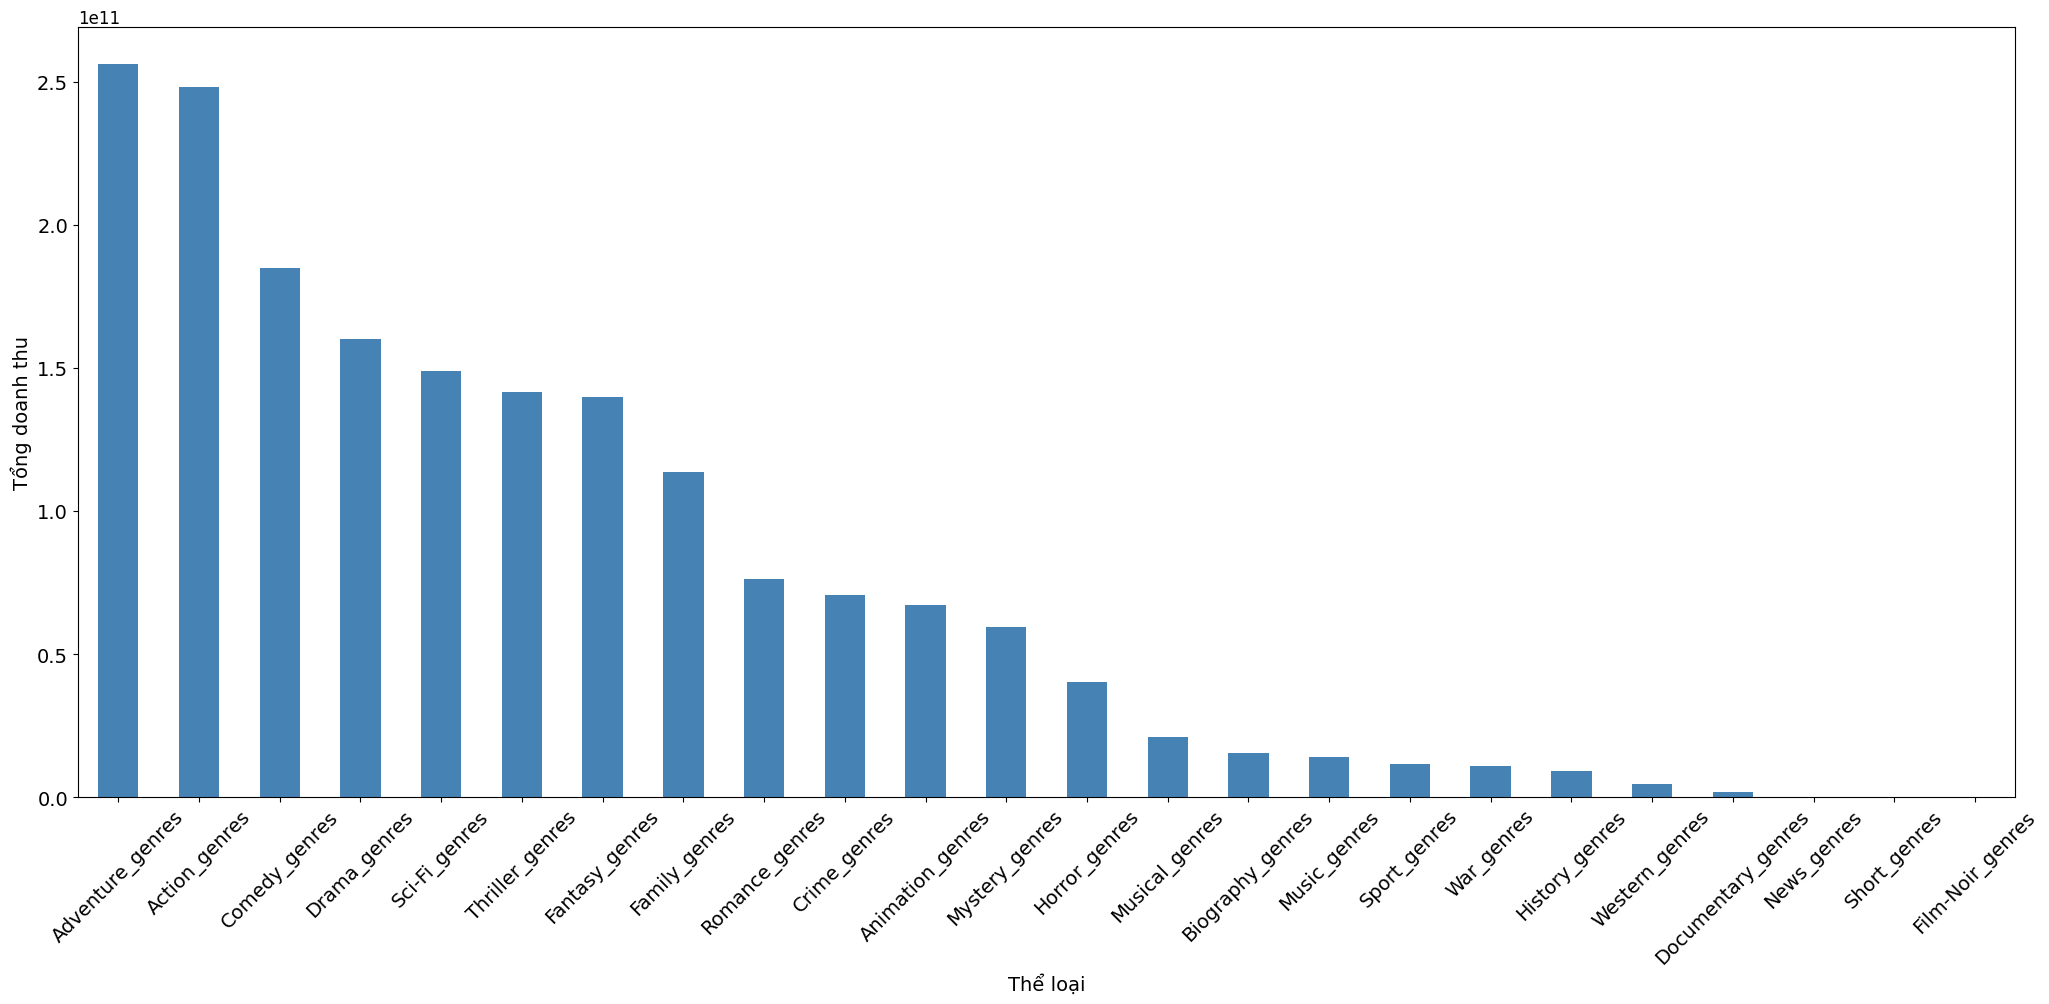

In [13]:
df_copy = movies_df.copy()
df_encoded = df_copy['genres'].str.get_dummies(',')
df_encoded.columns = [col + '_genres' for col in df_encoded.columns]
temp_df = pd.concat([movies_df['world_revenue'],df_encoded],axis=1)

genre_cols = [col for col in temp_df.columns if '_genres' in col]

sum_list = []
for col in genre_cols:
    sum = temp_df.loc[temp_df[col] == 1, 'world_revenue'].sum()
    sum_list.append(sum)
result_df = pd.DataFrame({"Genres": genre_cols, "Sum_Revenue": sum_list})

result_df = result_df.sort_values(by=['Sum_Revenue'],ascending=False)


# Vẽ bar plot
fig, ax = plt.subplots(figsize=(25, 10))
result_df.plot(kind='bar',
        x='Genres',
        y='Sum_Revenue',
        color='steelblue',
        ax=ax,
        legend=None,
        fontsize=14)


plt.xlabel('Thể loại',fontsize=14)
plt.ylabel('Tổng doanh thu',fontsize=14)
plt.xticks(rotation=45)
plt.show()

Mặc dù thể loại `Phiêu lưu` không phải là thể loại được sản xuất nhiều nhất từ trước đến nay nhưng `Phiêu lưu` là thể loại mang lại doanh thu cao nhất trong tất cả các thể loại trên.

Để hiểu rõ hơn về mối liên hệ giữa tổng doanh thu và số lượng thể loại trên mỗi phim, chúng ta cần phải thêm 1 cột đếm số lượng thể loại của mỗi phim:

In [14]:
movies_df['genres_count'] = movies_df['genres'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)
movies_df.head(5)

,title,domestic_revenue,world_revenue,distributor,opening_revenue,MPAA,genres,running_time,in_release,release_date,genres_count
0,Batman Returns,162831698,266831698,Warner Bros.,"45,687,711.00",PG-13,"Action,Crime,Fantasy",126.00,196.00,1992-06-19,3
1,Evolution,38345494,98376292,DreamWorks Distribution,"13,408,351.00",PG-13,"Comedy,Sci-Fi",101.00,207.00,2001-06-08,2
2,Jumanji,100475249,100475249,Sony Pictures Entertainment (SPE),"11,084,370.00",PG,"Adventure,Comedy,Family,Fantasy",104.00,383.00,1995-12-15,4
3,The American President,60079496,60079496,Sony Pictures Entertainment (SPE),"10,014,558.00",PG-13,"Comedy,Drama,Romance",114.00,411.00,1995-11-17,3
4,Mulholland Drive,7220243,20117339,Universal Pictures,"587,591.00",R,"Drama,Mystery,Thriller",147.00,450.00,2001-10-08,3


Text(0.5, 1.0, 'Revenue for different number of genres in the film')

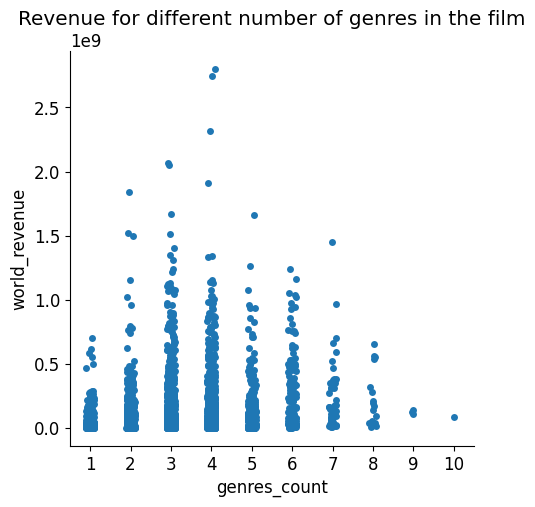

In [15]:
sns.catplot(x='genres_count', y='world_revenue', data=movies_df)
plt.title('Revenue for different number of genres in the film')

Các phim có doanh thu cao chủ yếu có từ 3-5 thể loại

#### **Kết luận:**

- Thể loại được sản xuất và được yêu thích nhiều nhất: **Chính kịch**.
- Top các thể loại yêu thích kế tiếp: **Phiêu lưu, Giật gân, Hài kịch, Hành động**.
- Thể loại mang lại doanh thu lớn nhất: **Phiêu lưu**.
- Để tạo nên một bộ phim mang lại doanh thu cao thì nên có tối thiểu từ 3 đến 6 thể loại trong nó.

### Câu 2: Liệu có sử ảnh hưởng nào của hệ thống phân loại MPAA đối với doanh thu của một bộ phim không?
- Ý nghĩa khi trả lời câu hỏi: 
    + Tìm ra phân loại MPAA có doanh thu cao nhất, từ đó tìm ra xu hướng của các bộ phim khi sử dụng hệ thống phân loại MPAA để đạt được doanh thu tối ưu nhất
    + Mở ra khả năng nghiên cứu sự tác động của phân loại MPAA đối với doanh thu trong cả thời gian ngắn và dài hạn. Có thể xác định xem liệu sự thay đổi trong phân loại có tác động ngay lập tức hay cần một khoảng thời gian để phản ánh trong doanh thu.

In [16]:
print(movies_df['MPAA'].unique())

['PG-13' 'PG' 'R' 'NC-17' 'G' 'Approved' 'TV-14' 'Not Rated']


In [17]:
# Thống kê mô tả doanh thu theo từng phân loại MPAA
mpaa_stats = movies_df.groupby('MPAA')['world_revenue'].describe()
print(mpaa_stats)

               count           mean            std           min  \
MPAA                                                               
Approved        1.00  41,634,471.00            NaN 41,634,471.00   
G              45.00 181,909,802.00 233,807,942.35    726,000.00   
NC-17           6.00  11,334,843.33  16,039,171.29  1,008,404.00   
Not Rated       2.00  25,586,508.50  10,747,279.90 17,987,034.00   
PG            837.00 134,775,757.77 213,576,781.16    153,504.00   
PG-13       1,823.00 144,746,823.40 257,160,539.92    214,328.00   
R           2,045.00  55,940,755.17  88,251,645.25    214,390.00   
TV-14           1.00   2,155,385.00            NaN  2,155,385.00   

                    25%           50%            75%              max  
MPAA                                                                   
Approved  41,634,471.00 41,634,471.00  41,634,471.00    41,634,471.00  
G         22,141,539.00 70,642,966.00 246,233,113.00 1,073,394,593.00  
NC-17      1,715,955.25  2,342,

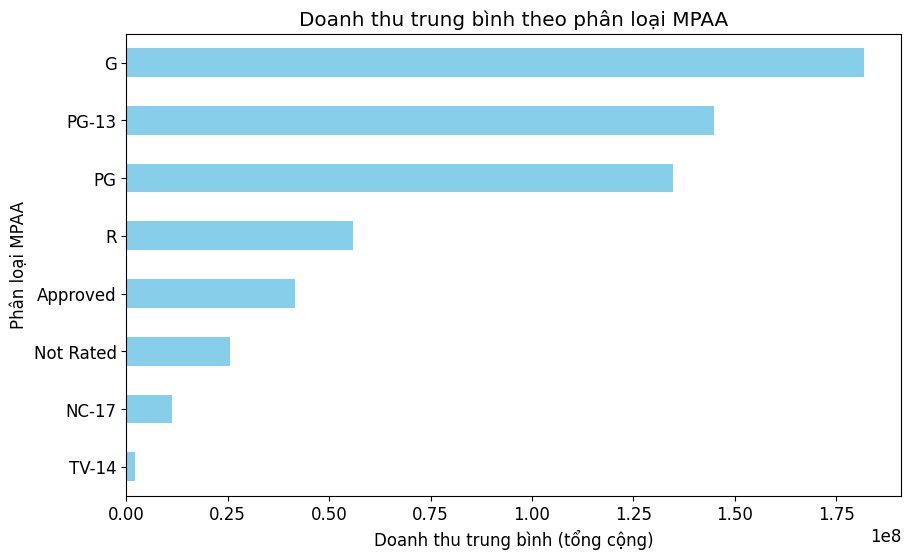

In [18]:
# Biểu đồ so sánh doanh thu giữa các nhóm phân loại MPAA
plt.figure(figsize=(10, 6))
movies_df.groupby('MPAA')['world_revenue'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.title('Doanh thu trung bình theo phân loại MPAA')
plt.xlabel('Doanh thu trung bình (tổng cộng)')
plt.ylabel('Phân loại MPAA')
plt.show()

Nhận xét biểu đồ : Ta thấy phân loại G và PG-13 có world_revenue cao nhất. 

- Ở đây ta sẽ dùng kiểm định t-test để kiểm định xem có sự khác biệt đáng kể về doanh thu giữa hai nhóm này không.

In [19]:
from scipy.stats import ttest_ind

mpaa_group1 = movies_df['world_revenue'][movies_df['MPAA'] == 'G']
mpaa_group2 = movies_df['world_revenue'][movies_df['MPAA'] == 'PG-13']

statistic, p_value = ttest_ind(mpaa_group1, mpaa_group2)
print(f'Kiểm định T-Test: Statistic={statistic}, p-value={p_value}')

Kiểm định T-Test: Statistic=0.9596367695304238, p-value=0.33736237992684104


- Dựa trên kết quả T-test: Không có sự khác biệt đáng kể giữa hai nhóm được chấp nhận, có nghĩa là không có sự khác biệt đáng kể giữa doanh thu của nhóm phim có phân loại MPAA 'PG-13' và 'G'.

- Điều này có thể ngụ ý rằng phân loại MPAA không ảnh hưởng đáng kể đến doanh thu toàn cầu của các bộ phim trong tập dữ liệu. Ta sẽ chứng minh xem điều này có đúng hay không.

In [20]:
from scipy.stats import f_oneway

grouped_data = [movies_df['world_revenue'][movies_df['MPAA'] == mpaa] for mpaa in movies_df['MPAA'].unique()]

# Kiểm định ANOVA
statistic, p_value = f_oneway(*grouped_data)
print(f'Kiểm định ANOVA: Statistic={statistic}, p-value={p_value}')

Kiểm định ANOVA: Statistic=34.10551066400748, p-value=1.1120671980268897e-46


- Ta thấy p-value rất gần 0, thể hiện rằng sự khác biệt giữa các nhóm là rất lớn và không phải là ngẫu nhiên.
- Dựa vào kết quả trên, có thể kết luận:
    + Có sự khác biệt đáng kể giữa các nhóm phân loại MPAA: Giả thuyết không thay đổi giữa các nhóm được bác bỏ. Có đủ bằng chứng để cho rằng có sự khác biệt đáng kể về doanh thu toàn cầu của các bộ phim giữa các nhóm phân loại MPAA.
    
    + Phân loại MPAA ảnh hưởng đáng kể đến doanh thu: Kết quả này ngụ ý rằng phân loại MPAA có tác động đáng kể đến doanh thu toàn cầu của các bộ phim trong tập dữ liệu.

- Kết luận được rằng phân loại MPAA ảnh hưởng đáng kể đến doanh thu.
- Vậy ta sẽ xem xét sự ảnh hưởng của MPAA theo ngày phát hành phim sẽ như thế nào.

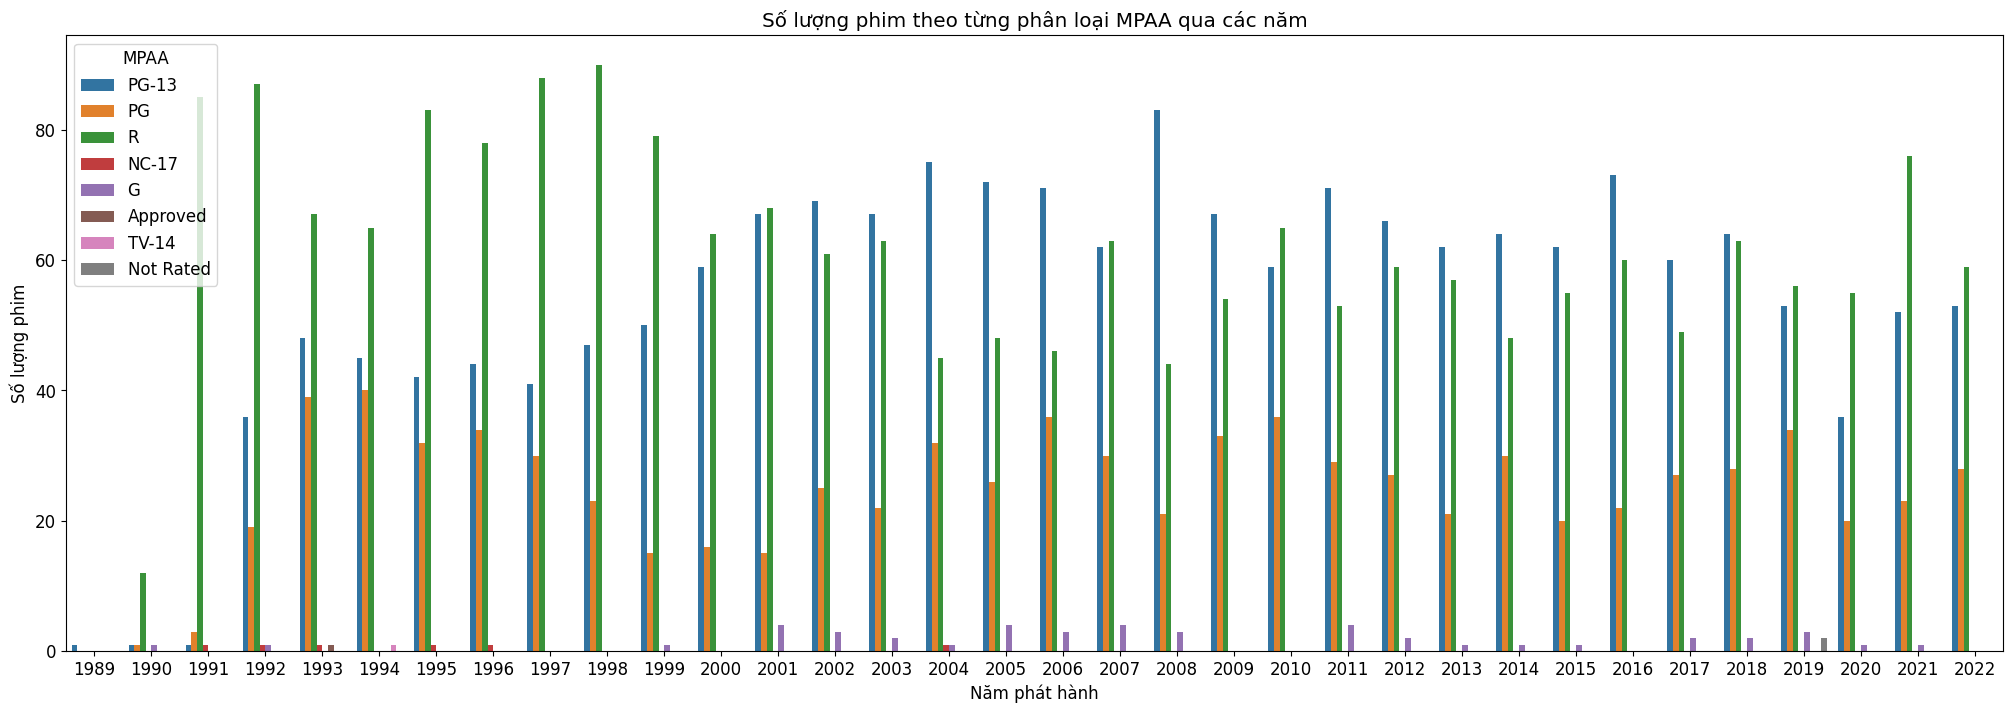

In [21]:
movies_df['release_year'] = movies_df['release_date'].dt.year

# Biểu đồ số lượng phim theo từng phân loại MPAA theo năm
plt.figure(figsize=(25, 8))
sns.countplot(x='release_year', hue='MPAA', data=movies_df)
plt.title('Số lượng phim theo từng phân loại MPAA qua các năm')
plt.xlabel('Năm phát hành')
plt.ylabel('Số lượng phim')
plt.show()

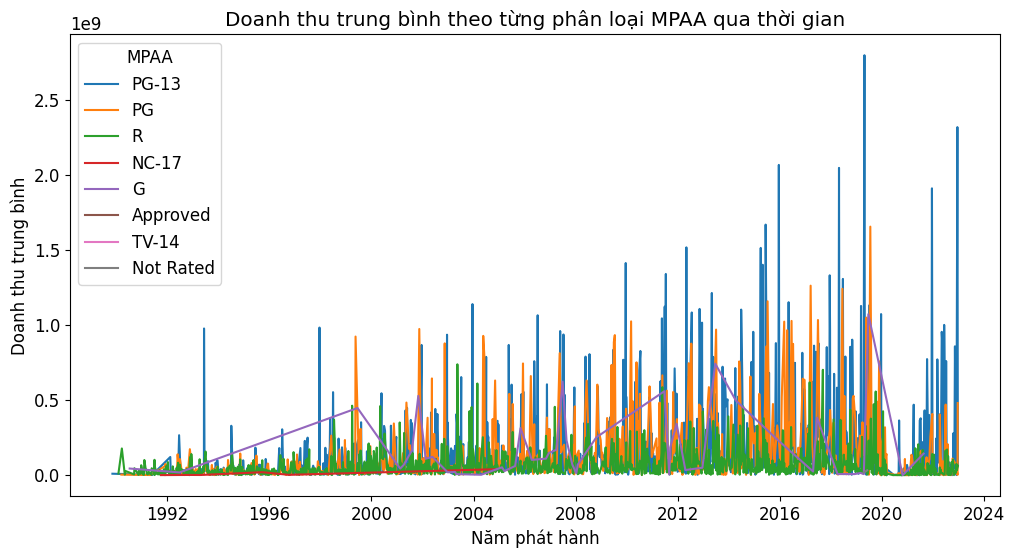

In [22]:
# Biểu đồ doanh thu trung bình theo từng phân loại MPAA qua thời gian
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='world_revenue', hue='MPAA', data=movies_df, ci=None)
plt.title('Doanh thu trung bình theo từng phân loại MPAA qua thời gian')
plt.xlabel('Năm phát hành')
plt.ylabel('Doanh thu trung bình')
plt.show()

Nhận xét biểu đồ: Doanh thu trung bình của phân loại PG-13 là cao nhất ở hầu hết các năm phát hành

- Phần ý nghĩa khi trả lời câu hỏi có đề cập đến việc có thể xác định xem liệu sự thay đổi trong phân loại có tác động ngay lập tức hay cần một khoảng thời gian để phản ánh trong doanh thu.
- Ở đây ta sẽ thử làm việc này.

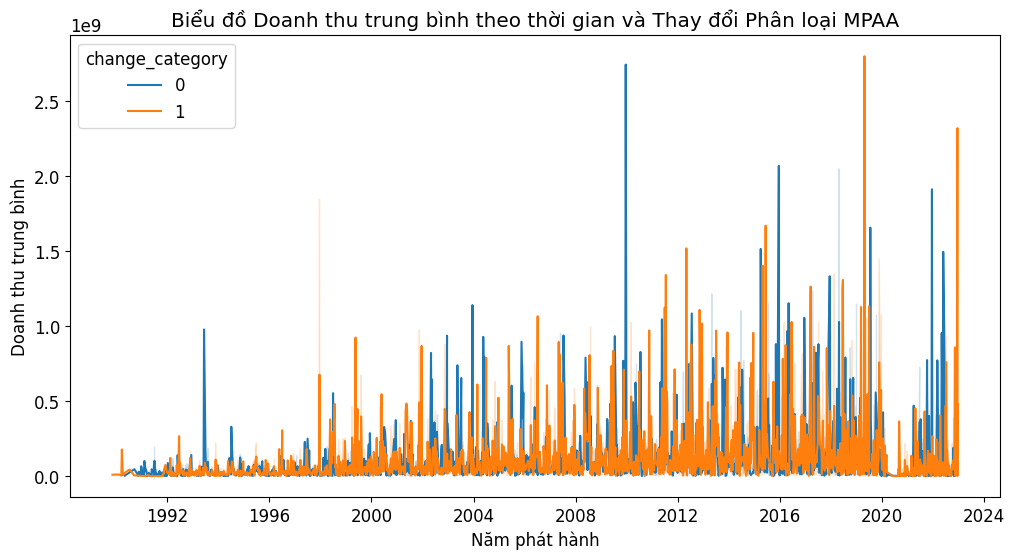

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# Tạo một cột mới 'change_category' để đánh dấu thay đổi phân loại (1: có thay đổi, 0: không có thay đổi)
movies_df['change_category'] = movies_df['MPAA'].ne(movies_df['MPAA'].shift()).astype(int)

# Biểu đồ doanh thu trung bình của từng nhóm theo thời gian
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='world_revenue', hue='change_category', data=movies_df)
plt.title('Biểu đồ Doanh thu trung bình theo thời gian và Thay đổi Phân loại MPAA')
plt.xlabel('Năm phát hành')
plt.ylabel('Doanh thu trung bình')
plt.show()

Nhận xét biểu đồ: 
- Sự thay đổi trong phân MPAA làm cho doanh thu tăng lên theo thời gian, nhưng cần một khoảng thời gian dài.
- Cụ thể, nếu xét trong khoảng 4 năm (1992-1996) thì doanh thu không biến động nhiều. Nhưng nếu xét từ năm 1992 đến năm 2016, có thể thấy doanh thu đã tăng nhiều.
- Ở một số thời điểm, việc không thay đổi phân loại MPAA làm cho doanh thu cao hơn rất nhiều so với mặt bằng chung.

### Câu 3: Phân tích mối tương quan giữa ngày phát hành và doanh thu . Thời điểm nào trong năm là thích hợp nhất để phát hành một bộ phim ? 
 




**Ý nghĩa khi trả lời câu hỏi:** 

 * Biết được thời điểm nào trong năm thích hợp nhất để ra mắt một bộ phim để tối ưu  doanh thu đạt được. 
 * Hiểu rõ hơn về mối tương quan giữa ngày ra mắt phim và doanh thu đạt được .

**Nguồn cảm hứng đặt câu hỏi:**
* Cảm hứng bắt nguồn từ câu hỏi thực tiễn rằng liệu có một thời điểm nào trong năm thích hợp nhất để ra mắt một bộ phim để đạt được doanh thu cao nhất không. Điều này có thể giúp các nhà sản xuất phim lên kế hoạch cho việc ra mắt phim của mình một cách hiệu quả hơn.

**Bước 1**: Tạo  cột `month` và cột `quarter` dự trên cột `release_date` để thuận tiện cho việc phân tích

In [24]:


df_copy = movies_df.copy()

# Tạo cột 'month' và 'quarter'
df_copy['month'] = df_copy['release_date'].dt.month
df_copy['quarter'] = df_copy['release_date'].dt.quarter



**Bước 2**: `Tính doanh thu trung vị theo tháng` và `vẽ biểu đồ trực quan` để có thể thấy rõ hơn mối tương quan giữa tháng ra mắt và doanh thu

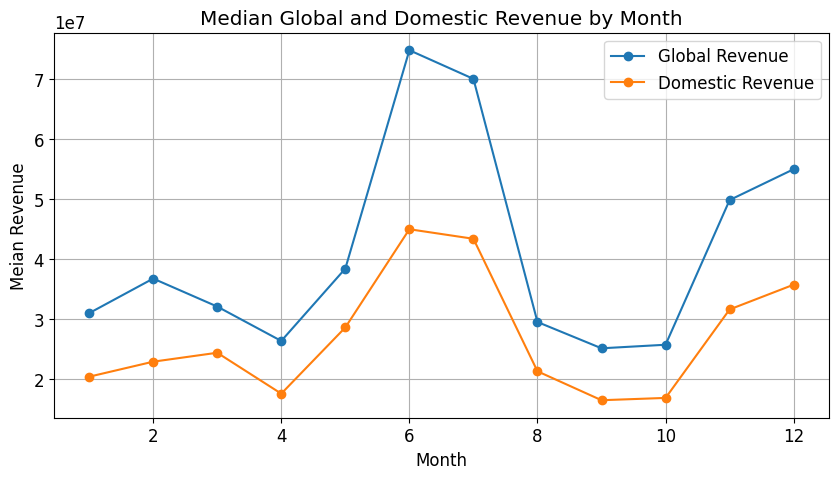

In [25]:

avg_revenue_by_month = df_copy.groupby('month')['world_revenue'].median()
avg_domestic_revenue_by_month = df_copy.groupby('month')['domestic_revenue'].median()

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.plot(avg_revenue_by_month.index, avg_revenue_by_month.values, marker='o', label='Global Revenue')
plt.plot(avg_domestic_revenue_by_month.index, avg_domestic_revenue_by_month.values, marker='o', label='Domestic Revenue')
plt.xlabel('Month')
plt.ylabel('Meian Revenue')
plt.title('Median Global and Domestic Revenue by Month')
plt.grid()
plt.legend()
plt.show()

**Bước 3**: `Phân tích doanh thu theo quý`, để có một cái nhìn tổng quan hơn về xu hướng của doanh thu theo mùa.

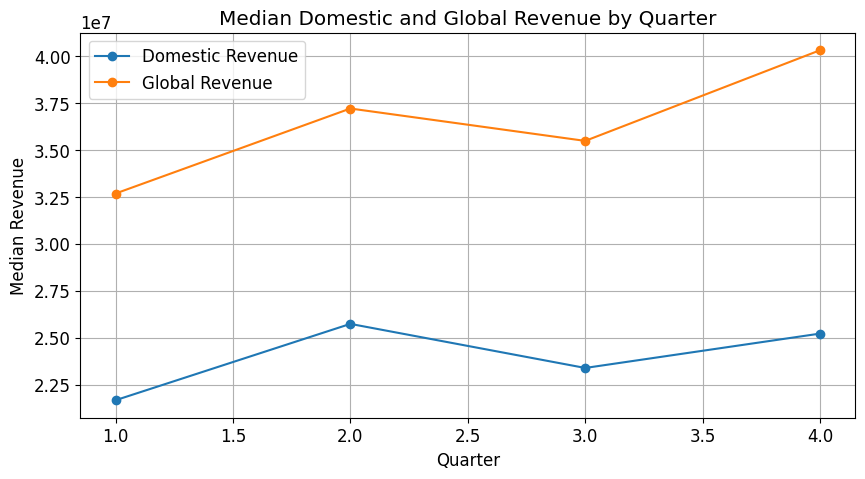

In [26]:

avg_domestic_revenue_by_quarter = df_copy.groupby('quarter')['domestic_revenue'].median()
avg_world_revenue_by_quarter = df_copy.groupby('quarter')['world_revenue'].median()

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.plot(avg_domestic_revenue_by_quarter.index, avg_domestic_revenue_by_quarter.values, marker='o', label='Domestic Revenue')
plt.plot(avg_world_revenue_by_quarter.index, avg_world_revenue_by_quarter.values, marker='o', label='Global Revenue')
plt.xlabel('Quarter')
plt.ylabel('Median Revenue')
plt.title('Median Domestic and Global Revenue by Quarter')
plt.grid()
plt.legend()
plt.show()


**Nhận xét**:

- Dựa trên các biểu đồ, có thể thấy rằng thời điểm ra mắt phim có ảnh hưởng đến doanh thu. Cụ thể, tháng 6, 5, 7, 11 và 12 tương ứng với Quý 2 va Quý 4 là những thời điểm  có doanh thu cao nhất. Điều này có thể được giải thích bởi việc tháng 6, 5, và 7 nằm trong mùa hè, đây là thời điểm mà học sinh, sinh viên có nhiều thời gian rảnh rỗi để xem phim. Tháng 11 và 12 là mùa đông, đây là một mùa với thời tiết lạnh kết hợp với việc chứa nhiều kỳ nghỉ lễ nên cũng thu hút được lượng lớn khán giả đến rạp.


**Kết luận**:

- Thời điểm phát hành có ảnh hướng đến doanh thu đạt được.
- `Quý 2` và `Quý 4` là hai thời điểm mà các bộ phim đạt được doanh thu cao thường phát hành. 
- Tuy nhiên, cần lưu ý rằng việc chọn thời điểm ra mắt phim không phải là yếu tố duy nhất quyết định đến doanh thu. Các yếu tố khác như thể loại, chỉ số MPAA,... cũng đóng vai trò quan trọng. Do đó, việc lựa chọn thời điểm ra mắt phim cần phải cân nhắc kỹ lưỡng và kết hợp với các yếu tố khác để đạt được doanh thu tối ưu.

### Câu 4: Liệu việc lựa chọn nhà phát hành có ảnh hưởng đến doanh thu của một bộ phim hay không? Các nhà phát hành nào có khả năng sản xuất phim đạt doanh thu cao?

**Ý nghĩa khi trả lời câu hỏi:**
- Có thể lựa chọn được các nhà phát hành tốt để sản xuất phim hoặc để mua bản quyền phim để đạt doanh thu lớn
- Dự đoán được doanh thu bằng doanh thu của ngày phát hành để thấy được mức độ thu hút của phim từ đó đưa ra các giải pháp marketing phù hợp để tăng doanh 




**Đầu tiên chúng ta sẽ lựa chọn ra các nhà phát hành có doanh thu trung bình lớn nhất**

distributor
101 Studios                            55604798
20th Century Studios                 3326967448
8x Entertainment                       19776141
A24                                   415100557
Affirm Films                           72308654
                                        ...    
Warner Independent Pictures (WIP)     140971138
Well Go USA Entertainment               2348659
Yari Film Group Releasing               5812781
Zeitgeist Films                        24322180
Zhen Pictures                           1198967
Name: world_revenue, Length: 178, dtype: int64
distributor
Walt Disney Studios Motion Pictures    85706560456
Warner Bros.                           83956616856
Universal Pictures                     64503745398
Twentieth Century Fox                  61687256150
Sony Pictures Entertainment (SPE)      52160173723
Paramount Pictures                     41758061761
Lions Gate Films                       18022716100
DreamWorks                             11422

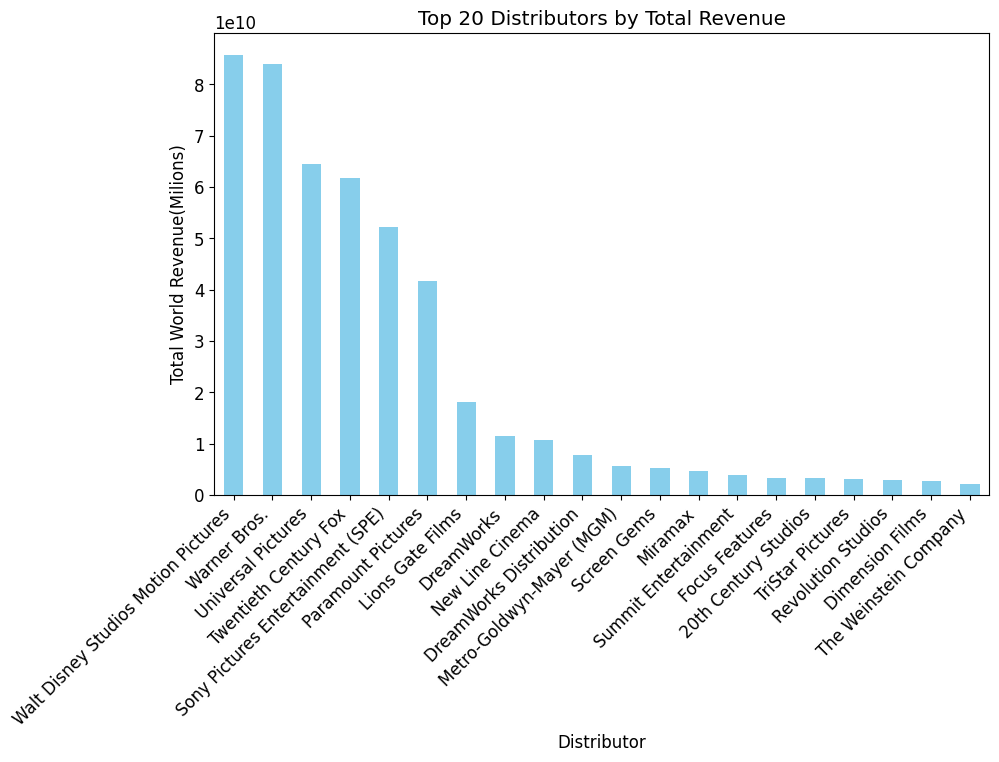

In [27]:
# Tính tổng doanh thu theo nhà phát hành
revenue_by_distributor = movies_df.groupby('distributor')['world_revenue'].sum()

print(revenue_by_distributor)

# Chọn ra 20 nhà phát hành có tổng doanh thu cao nhất
top_distributors = revenue_by_distributor.nlargest(20)
print(top_distributors)
# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
top_distributors.plot(kind='bar', color='skyblue')
plt.title('Top 20 Distributors by Total Revenue')
plt.xlabel('Distributor')
plt.ylabel('Total World Revenue(Milions)')
plt.xticks(rotation=45, ha='right')
plt.show()


**Ta chọn ra các nhà phát hành có nhiều phim có doanh thu lớn hơn doanh thu trung bình nhất để có cái nhìn rõ hơn về chất lượng của những nhà phát hành phim**

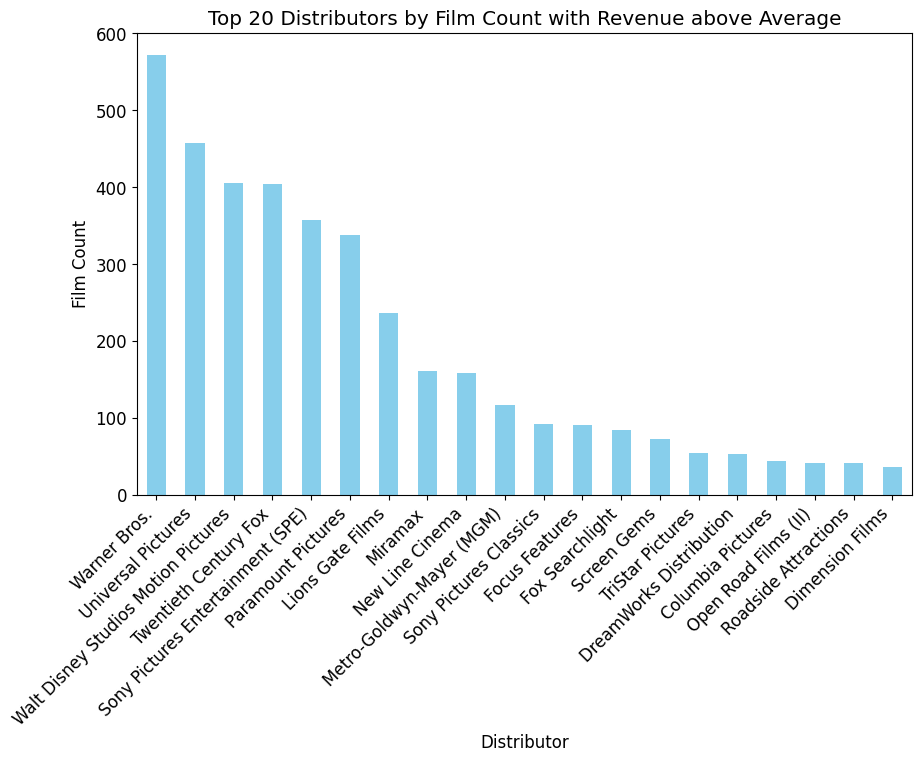

In [28]:
if not movies_df.empty:
    #Tính doanh thu trung bình
    distributor_stats = movies_df.groupby('distributor')['world_revenue'].agg(['mean', 'count'])

    # Tính số lượng phim có doanh số trên doanh thu trung bình
    top_distributors = distributor_stats[distributor_stats['count'] > distributor_stats['count'].mean()].nlargest(20, 'count')

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    top_distributors['count'].plot(kind='bar', color='skyblue')
    plt.title('Top 20 Distributors by Film Count with Revenue above Average')
    plt.xlabel('Distributor')
    plt.ylabel('Film Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("DataFrame is empty.")


**Tuy vậy trong một số trường hợp, một số nhà làm phim có doanh số cao trong quá khứ nhưng hiện tại đã phá sản. Vì vậy, chúng ta vẽ biểu đồ cho sự phát triển của 20 nhà phát hành phim có doanh thu lớn nhất theo nhóm thời gian 4 năm**

<Figure size 1500x800 with 0 Axes>

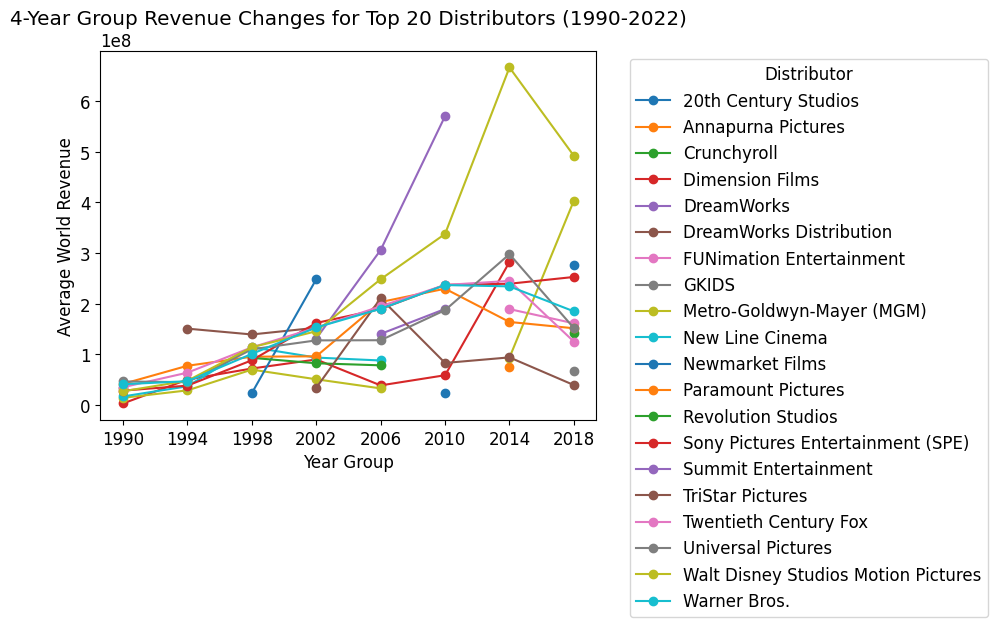

In [29]:

# Nhóm dữ liệu theo khoảng thời gian 4 năm
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df['year_group'] = pd.cut(movies_df['release_date'].dt.year, bins=range(1990, 2023, 4), labels=range(1990, 2022, 4))

# Nhóm các nhà phát hành theo dữ liệu ở trên và tính trung bình doanh thu
distributor_yearly_stats = movies_df.groupby(['distributor', 'year_group'])['world_revenue'].mean().reset_index()

# Chọn ra 20 nhà phát hành có doanh thu cao nhất
top_distributors = distributor_yearly_stats.groupby('distributor')['world_revenue'].mean().nlargest(20).index
filtered_df = distributor_yearly_stats[distributor_yearly_stats['distributor'].isin(top_distributors)]

# Sắp xếp dữ liệu
pivot_df = filtered_df.pivot(index='year_group', columns='distributor', values='world_revenue')

# Vễ biểu đồ
plt.figure(figsize=(15, 8))
pivot_df.plot(kind='line', marker='o')
plt.title('4-Year Group Revenue Changes for Top 20 Distributors (1990-2022)')
plt.xlabel('Year Group')
plt.ylabel('Average World Revenue')
plt.legend(title='Distributor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Nhận xét:**

- Nhìn vào biểu đồ cho ta thấy trung bình doanh thu phân nhóm rõ rệt ở mức cao và thấp dần
- Một số hãng có doanh thu cao nhưng chỉ dựa vào vài bộ phim và không có mức tăng rõ ràng
- Các hãng phim lâu đời như Walt Disney, Warner Bros,.. có doanh thu nằm ở mức cao

**Kết luận:**

- Nhà phát hành có tác động đến doanh số của một bộ phim
- Nhà phát hành càng lâu đời thì doanh số càng cao
- Nên chọn những ngành như Walt Disney, Universal, Warner Bros,.. để sản xuất phim vì những nhà sản xuất này nổi tiếng và tuổi đời nhờ đó mang lại lợi nhuận cao

### Câu 5: Mối tương quan giữa thời lượng phim và tổng doanh thu của phim như thế nào? Liệu thời lượng phim càng nhiều thì doanh thu càng cao?
- Ý nghĩa khi trả lời câu hỏi:
  - Biết được sự phân phối của thời lượng phim.
  - Hiểu được sự liên hệ giữa doanh thu và thời lượng.

In [30]:
copy = movies_df.copy()
copy['running_time_hours'] = movies_df['running_time']/60

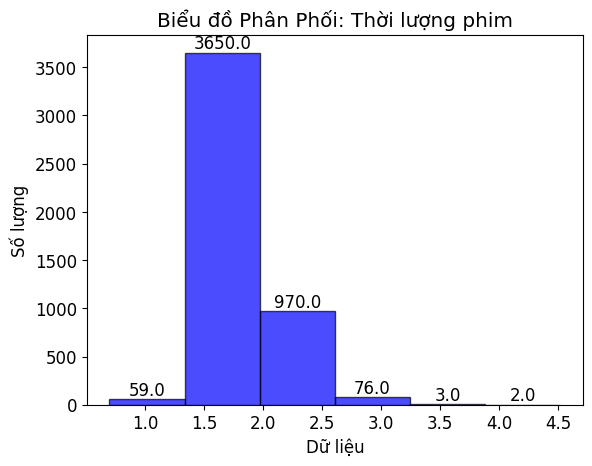

{'bin 0': 59.0,
 'bin 1': 3650.0,
 'bin 2': 970.0,
 'bin 3': 76.0,
 'bin 4': 3.0,
 'bin 5': 2.0}

In [31]:
hist, bin_edges,_ = plt.hist(copy['running_time_hours'], bins=6, color='blue', edgecolor='black', alpha=0.7)

count_each_bin = {}
# Hiển thị số lượng từng bin
for i, count in enumerate(hist):
    bin_start = bin_edges[i]
    bin_end = bin_edges[i + 1]
    temp = 'bin ' + str(i)
    count_each_bin[temp] = count
#ghi chú thêm số liệu
for i, count in enumerate(hist):
    bin_start = bin_edges[i]
    bin_end = bin_edges[i + 1]
    temp = 'bin ' + str(i)
    count_each_bin[temp] = count
    plt.text((bin_start + bin_end) / 2, count, str(count), ha='center', va='bottom')

plt.xlabel('Dữ liệu')
plt.ylabel('Số lượng')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ Phân Phối: Thời lượng phim')

# Hiển thị biểu đồ
plt.show()
count_each_bin

Ta thấy rằng, thời lượng của các bộ phim chủ yếu rơi vào khoảng 1.5 tiếng đến 2 tiếng.

Tổng doanh thu trong bin 1: 1723766901
Tổng doanh thu trong bin 2: 1972799245
Tổng doanh thu trong bin 3: -107062520
Tổng doanh thu trong bin 4: 30765269057
Tổng doanh thu trong bin 5: 1201775857
Tổng doanh thu trong bin 6: 4739189


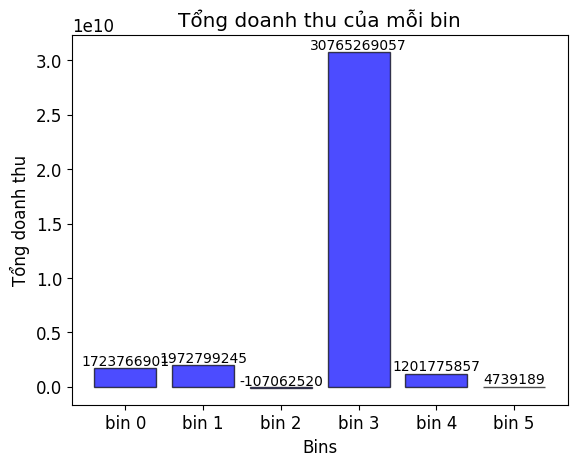

In [32]:
running_time = copy['running_time_hours'].tolist()
world_revenue = copy['world_revenue'].tolist()

# Tạo histogram cho cột running_time
num_bins = 6
hist, bin_edges = np.histogram(running_time, bins=num_bins)
revenue = {}
# Tính tổng doanh thu cho từng bin
for i in range(len(bin_edges) - 1):
    bin_start = bin_edges[i]
    bin_end = bin_edges[i + 1]
    bin_data = [world_revenue[j] for j in range(len(running_time)) if bin_start <= running_time[j] < bin_end]
    total_revenue = 0
    total_revenue = np.sum(bin_data)
    temp = 'bin '+ str(i)
    revenue[temp] = total_revenue
    print(f'Tổng doanh thu trong bin {i + 1}: {total_revenue}')
 
bin_labels = list(revenue.keys())
bin_counts = list(revenue.values())


plt.bar(bin_labels, bin_counts, color='blue', alpha=0.7, edgecolor='black')
for i, count in enumerate(bin_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom',fontsize=10)

plt.xlabel('Bins')
plt.ylabel('Tổng doanh thu')
plt.title('Tổng doanh thu của mỗi bin')

# Display the bar chart
plt.show()

Ta thấy rằng, nếu thời lượng phim từ 1.5 tiếng đến 2 tiếng mang lại doanh thu lớn nhất trong tiêu chí này.

Kết luận:
- Thời lượng lý tưởng cho một bộ phim là từ 1.5 tiếng đến 2 tiếng. Không phải thời lượng quá nhiều sẽ mang lại doanh thu lớn.